# WP Data Science | Praktikum 1
## Explorative Datenanalyse

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/day.csv')

### Beschreibung des Datensatzes

aus https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset  
abgerufen 13.05.2021

#### Source:

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto  
INESC Porto, Campus da FEUP  
Rua Dr. Roberto Frias, 378  
4200 - 465 Porto, Portugal  

Original Source: http://capitalbikeshare.com/system-data  
Weather Information: http://www.freemeteo.com  
Holiday Schedule: http://dchr.dc.gov/page/holiday-schedule  

#### Data Set Information:

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

#### Attribute Information:

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit :
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered


### Aufbau des Datensatzes

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Erfreulicherweise gibt es keine Null-Werte/NA im Datensatz.
Da dteday noch nicht als Datum eingelesen wurden, wird der Datentyp im folgenden manuell angepasst.

In [5]:
df['dteday'] = pd.to_datetime(df['dteday'])

Auch wenn es bei einigen der kategorialen Daten nicht eindeutig ist, ob diese als nominal- oder ordinalskaliert anzunehmen sind wird der großteil als nominalskaliert angenommen.
So sind etwa 'season', 'mnth' und 'weekday' nur über die Zusatzinformationen, wie das Kalenderjahr, bzw. die Kalenderwoche in eine Ordnung zu bringen.  
Bei 'weathersit', könnte man auf Basis von Annahmen zur Fachdomäne eine Ordnung definieren. So ist anzunehmen, dass die angegebene Zuordnung...
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  
...das für das Verleihgeschäft beste Wetter in absteigender Ordnung repräsentiert.  
'workingday' und 'weekday' können hingegen eindeutig als nominal- und 'yr' als ordinalskaliert angenommen werden.

In [6]:
nominal = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
ordinal = ['yr']

In [7]:
for col in nominal:
    df[col] = pd.Categorical(df[col])
    print(df[col])

0      1
1      1
2      1
3      1
4      1
      ..
726    1
727    1
728    1
729    1
730    1
Name: season, Length: 731, dtype: category
Categories (4, int64): [1, 2, 3, 4]
0       1
1       1
2       1
3       1
4       1
       ..
726    12
727    12
728    12
729    12
730    12
Name: mnth, Length: 731, dtype: category
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]
0      0
1      0
2      0
3      0
4      0
      ..
726    0
727    0
728    0
729    0
730    0
Name: holiday, Length: 731, dtype: category
Categories (2, int64): [0, 1]
0      6
1      0
2      1
3      2
4      3
      ..
726    4
727    5
728    6
729    0
730    1
Name: weekday, Length: 731, dtype: category
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]
0      0
1      0
2      1
3      1
4      1
      ..
726    1
727    1
728    0
729    0
730    1
Name: workingday, Length: 731, dtype: category
Categories (2, int64): [0, 1]
0      2
1      2
2      1
3      1
4      1
      ..
726    2
727    2
728  

In [8]:
for col in ordinal:
    df[col] = pd.Categorical(df[col], ordered=True)
    print(df[col])

0      0
1      0
2      0
3      0
4      0
      ..
726    1
727    1
728    1
729    1
730    1
Name: yr, Length: 731, dtype: category
Categories (2, int64): [0 < 1]


In [9]:
df.dtypes

instant                int64
dteday        datetime64[ns]
season              category
yr                  category
mnth                category
holiday             category
weekday             category
workingday          category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

#### Mappings für kategoriale Daten

In [10]:
mapping_dict = {
    'season':{1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'},
    'yr':{0: '2011', 1:'2012'},
    'mnth':{1: 'Jan', 2: 'Feb', 3: 'Mar', 4:'Apr', 5:'May', 6:'Jun', 
            7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'},
    'holiday':{0: 'No Holiday', 1:'Holiday'},
    'weekday':{0: 'Sunday', 1: 'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'},
    'workingday':{0:'No Workingday', 1:'Workingday'},
    'weathersit':{1: 'Clear', 2:'Mist', 3:'Light Rain/Snow', 4:'Heavy Rain/Snow/Hail'}
               }

In [11]:
for col in nominal+ordinal:
    df[col] = df[col].cat.rename_categories(mapping_dict[col])
    print(df[col])

0      Winter
1      Winter
2      Winter
3      Winter
4      Winter
        ...  
726    Winter
727    Winter
728    Winter
729    Winter
730    Winter
Name: season, Length: 731, dtype: category
Categories (4, object): ['Winter', 'Spring', 'Summer', 'Fall']
0      Jan
1      Jan
2      Jan
3      Jan
4      Jan
      ... 
726    Dec
727    Dec
728    Dec
729    Dec
730    Dec
Name: mnth, Length: 731, dtype: category
Categories (12, object): ['Jan', 'Feb', 'Mar', 'Apr', ..., 'Sep', 'Oct', 'Nov', 'Dec']
0      No Holiday
1      No Holiday
2      No Holiday
3      No Holiday
4      No Holiday
          ...    
726    No Holiday
727    No Holiday
728    No Holiday
729    No Holiday
730    No Holiday
Name: holiday, Length: 731, dtype: category
Categories (2, object): ['No Holiday', 'Holiday']
0       Saturday
1         Sunday
2         Monday
3        Tuesday
4      Wednesday
         ...    
726     Thursday
727       Friday
728     Saturday
729       Sunday
730       Monday
Name: weekda

#### Werte denormalisieren

In [12]:
'''
temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
hum: Normalized humidity. The values are divided to 100 (max)
windspeed: Normalized wind speed. The values are divided to 67 (max)
'''
df['temp_denorm'] = df['temp']*(39-(-8))+(-8)
df['atemp_denorm'] = df['atemp']*(50-(-16))+(-16)
df['hum_denorm'] = df['hum']*100
df['windspeed_denorm'] = df['windspeed'] * 67

### Explorative Analysen

In [13]:
df.describe()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt,temp_denorm,atemp_denorm,hum_denorm,windspeed_denorm
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,15.283085,15.307363,62.789406,12.762576
std,211.165812,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,8.603397,10.755438,14.242910,5.192357
min,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,-5.220871,-10.781406,0.000000,1.500244
25%,183.500000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,7.842925,6.297605,52.000000,9.041650
50%,366.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,15.421651,16.124378,62.666700,12.125325
75%,548.500000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,22.804575,24.167732,73.020850,15.625371
max,731.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,32.498349,39.499136,97.250000,34.000021


In [14]:
df.describe(include=['category'])

,season,yr,mnth,holiday,weekday,workingday,weathersit
count,731,731,731,731,731,731,731
unique,4,2,12,2,7,2,3
top,Summer,2012,Jan,No Holiday,Sunday,Workingday,Clear
freq,188,366,62,710,105,500,463


In [15]:
df['weathersit'].value_counts()

Clear              463
Mist               247
Light Rain/Snow     21
Name: weathersit, dtype: int64

In [16]:
df.median()

<ipython-input-16-6d467abf240d>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.median()


instant              366.000000
temp                   0.498333
atemp                  0.486733
hum                    0.626667
windspeed              0.180975
casual               713.000000
registered          3662.000000
cnt                 4548.000000
temp_denorm           15.421651
atemp_denorm          16.124378
hum_denorm            62.666700
windspeed_denorm      12.125325
dtype: float64

### Visualisierungen

In [17]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_theme(style="whitegrid")

#### Univariat

<AxesSubplot:xlabel='casual', ylabel='Count'>

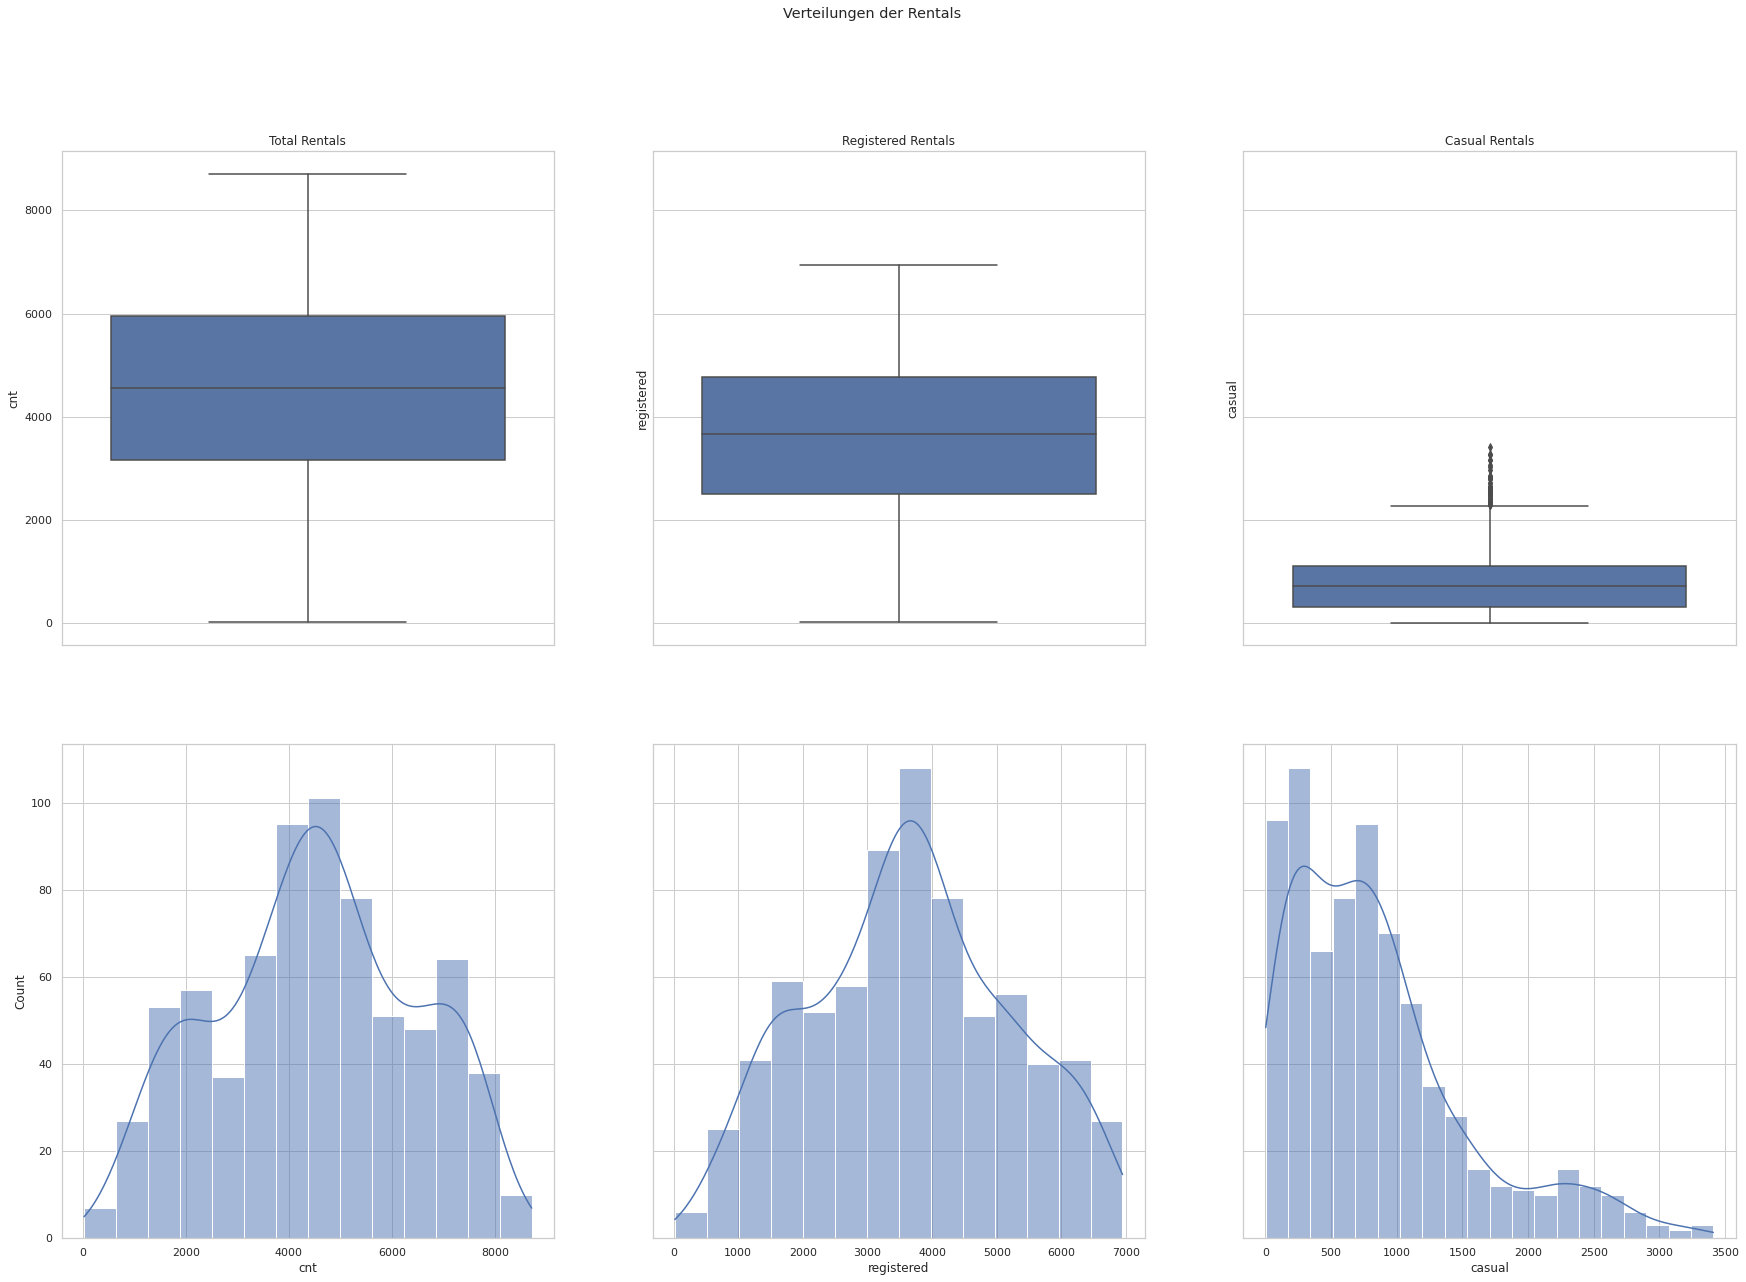

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(30, 20), sharey='row')
fig.suptitle('Verteilungen der Rentals')

# cnt
sns.boxplot(y=df['cnt'], ax=axes[0][0])
axes[0][0].set_title('Total Rentals')

sns.histplot(x=df['cnt'], ax=axes[1][0], kde=True)

# registered
sns.boxplot(y=df['registered'], ax=axes[0][1])
axes[0][1].set_title('Registered Rentals')

sns.histplot(x=df['registered'], ax=axes[1][1], kde=True)

# casual
sns.boxplot(y=df['casual'], ax=axes[0][2])
axes[0][2].set_title('Casual Rentals')

sns.histplot(x=df['casual'], ax=axes[1][2], kde=True)


Es zeigt sich bei den Casual Rentals eine linksschiefe Verteilung der Werte mit einigen Ausreißern, die sich deutlich von der Verteilung der Registered Rentals unterscheidet.

In [19]:
def get_iqr_outliers(df, colname):
    """
    Abgeänderte Funktion basierend auf Blog-Artikel.
    Source: https://www.back2code.me/2017/08/outliers/
    """
    q1 = df[colname].quantile(0.25)
    q3 = df[colname].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - (1.5*iqr)
    upper = q3 + (1.5*iqr)
    
    return df[(lower > df[colname]) | (df[colname] > upper)]
    

In [20]:
casual_outliers = get_iqr_outliers(df, 'casual')
casual_outliers.describe(include=['category'])

,season,yr,mnth,holiday,weekday,workingday,weathersit
count,44,44,44,44,44,44,44
unique,4,2,9,2,5,2,2
top,Spring,2012,May,No Holiday,Saturday,No Workingday,Clear
freq,20,38,8,41,24,43,32


Bei den Ausreißerwerten der 'casual' Leihen handelt es sich bis auf einen Tag nicht um Werktage und in über der Hälfte der Fälle um Samstage. Das mit 38 von 44 die meisten Ausreißer dem Jahr 2012 zugeordnet werden können ist nicht verwunderlich, da hier die Verleihzahlen generell höher sind als in 2011.

<AxesSubplot:xlabel='windspeed_denorm', ylabel='Count'>

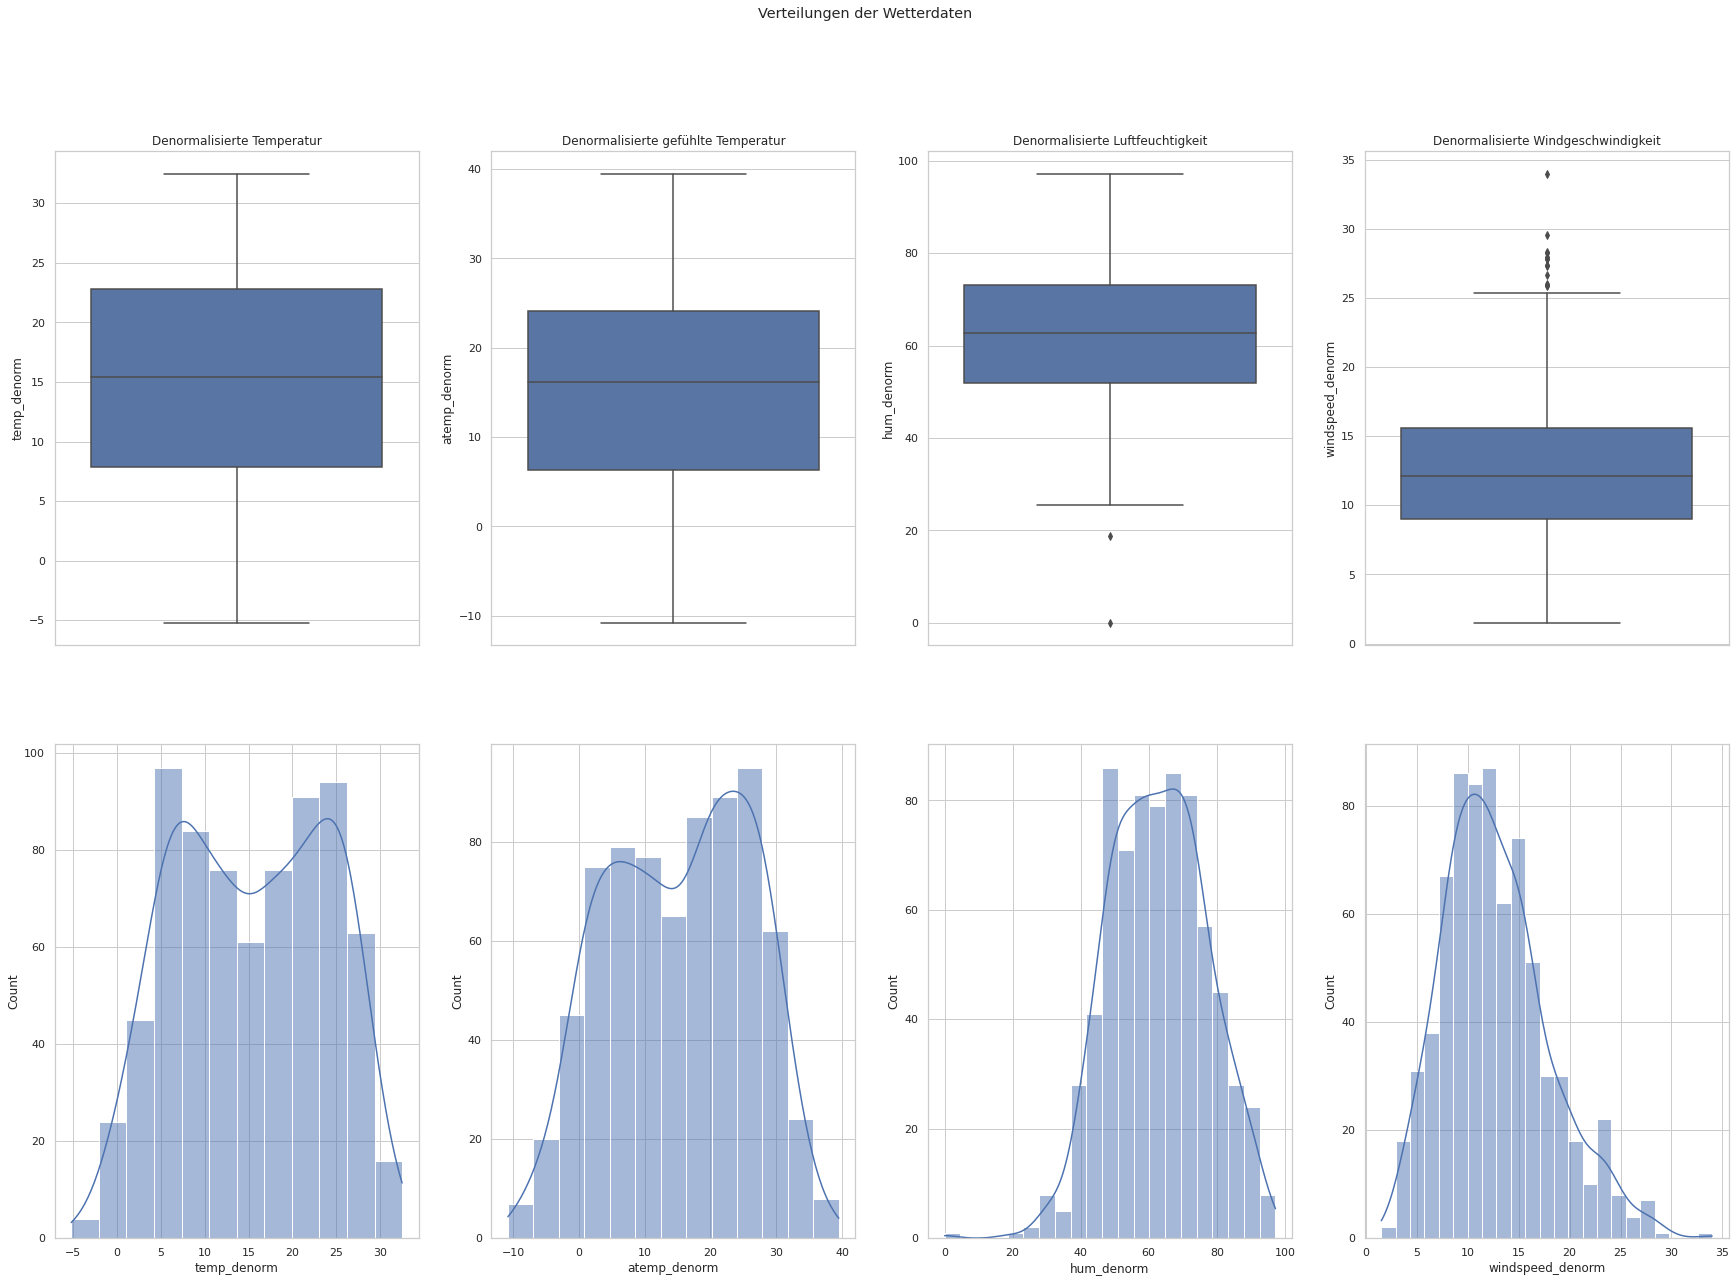

In [21]:
fig, axes = plt.subplots(2, 4, figsize=(30, 20))
fig.suptitle('Verteilungen der Wetterdaten')

# temp
sns.boxplot(y=df['temp_denorm'], ax=axes[0][0])
axes[0][0].set_title('Denormalisierte Temperatur')

sns.histplot(x=df['temp_denorm'], ax=axes[1][0], kde=True)

# atemp
sns.boxplot(y=df['atemp_denorm'], ax=axes[0][1])
axes[0][1].set_title('Denormalisierte gefühlte Temperatur')

sns.histplot(x=df['atemp_denorm'], ax=axes[1][1], kde=True)

# temp
sns.boxplot(y=df['hum_denorm'], ax=axes[0][2])
axes[0][2].set_title('Denormalisierte Luftfeuchtigkeit')

sns.histplot(x=df['hum_denorm'], ax=axes[1][2], kde=True)

# temp
sns.boxplot(y=df['windspeed_denorm'], ax=axes[0][3])
axes[0][3].set_title('Denormalisierte Windgeschwindigkeit')

sns.histplot(x=df['windspeed_denorm'], ax=axes[1][3], kde=True)

Es zeigen sich sowohl für die Luftfeuchtigkeit als auch für die Windgeschwindigkeit einige Ausreißer und eine rechts- bzw. linksschiefe Verteilung.

#### Multivariat

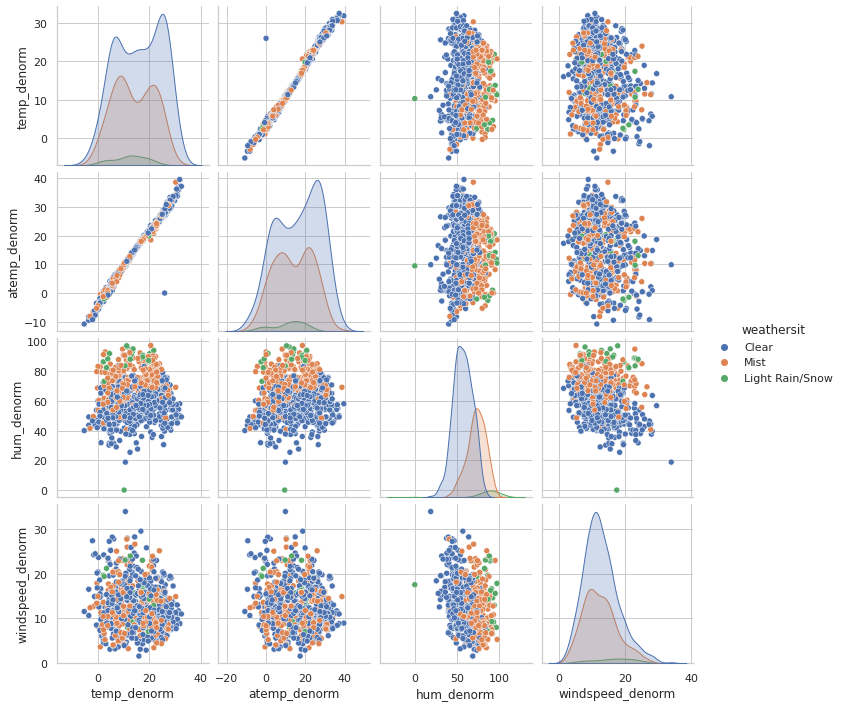

In [22]:
weather_df = df[['temp_denorm', 'atemp_denorm', 'hum_denorm', 'windspeed_denorm', 'weathersit']]
sns.pairplot(weather_df, hue='weathersit')

Besonders auffällig an dieser Darstellung ist, dass ein Datenpunkt vorliegt, welcher von dem sonst beinahe perfekt linearem Zusammenhang von der tatsächlichen und der gefühlten Temperatur abweicht. Da nach diesem Punkt die gefühlte Temperatur bei 0 Grad liegt und die tatsächliche Temperatur bei ca. 30 Grad, wird es sich hierbei vermutlich um einen Fehler bzw. fehlenden Wert handeln. Darüberhinaus zeigen sich keine eindeutigen Zusammenhänge zwischen Temperatur, Luftfeuchtigkeit und Windstärke und erwartbare Zusammenhänge zwischen diesen Variablen und der Wettersituation. Etwa eine geringere Luftfeuchtigkeit an klaren im Vergleich zu nebeligen Tagen.

Text(0.5, 0, 'Monat')

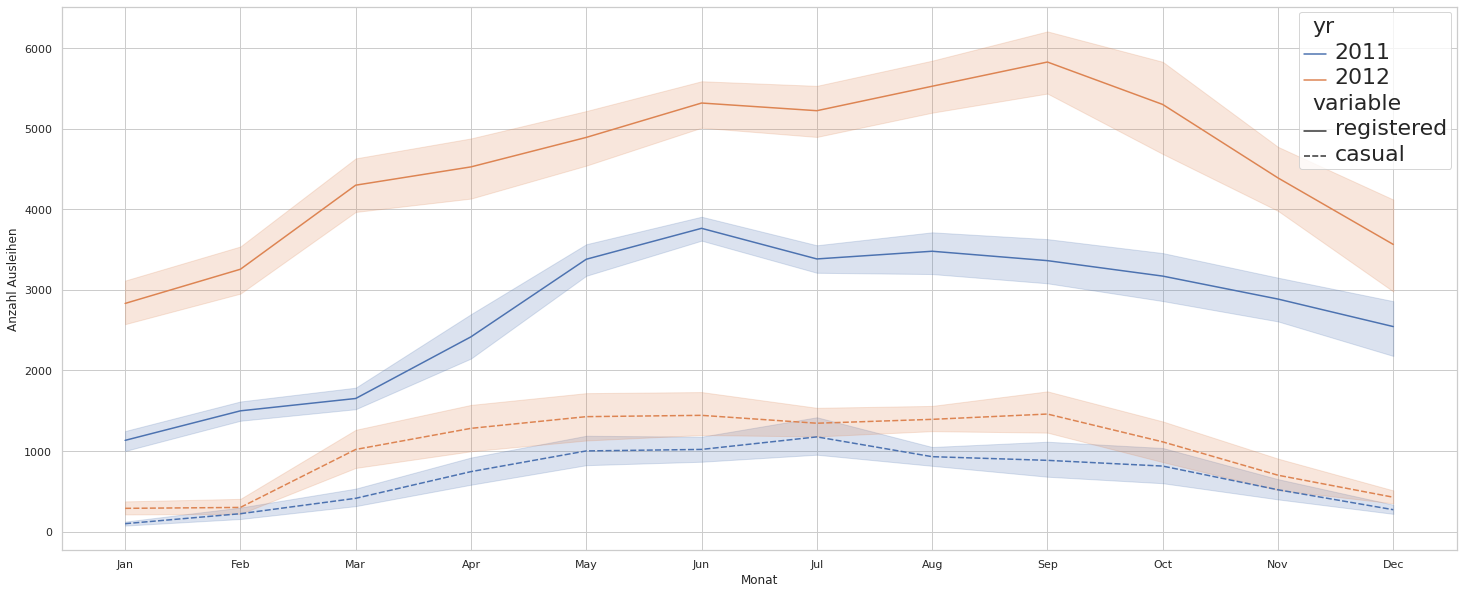

In [23]:
long_data = pd.melt(df, id_vars=['mnth','yr'], value_vars=['registered', 'casual'])

fig, axes = plt.subplots(figsize=(25,10))
sns.lineplot(data=long_data, x='mnth', hue='yr', y='value', style='variable')

plt.setp(axes.get_legend().get_texts(), fontsize='22')
plt.ylabel('Anzahl Ausleihen')
plt.xlabel('Monat')

Es zeigt sich ein Anstieg sowohl der registriered als auch der casual Ausleihen in 2012 im Vergleich zu 2011.Bei den Casual ausleihen scheint der Anstieg jedoch vorallem in den SommerMonaten Jun-Aug und ab mitte Sep nicht an allen Tagen zu bestehen. Während in 2011 die meisten registrierten Leihen im Juni stattfanden gibt es in 2012  zwischen Juli und September einen erneuten Anstieg. Ansonsten ähneln sich die Verläufe im Jahresvergleich.

<AxesSubplot:xlabel='registered', ylabel='casual'>

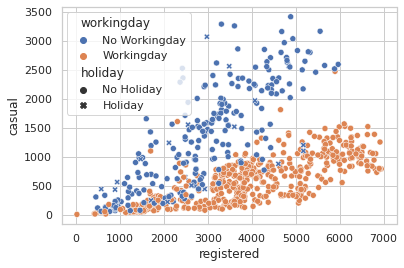

In [24]:
sns.scatterplot(data=df, x='registered', y='casual', hue='workingday', style='holiday')

Es zeigt sich, dass der Zusammenhang zwischen der Anzahl der 'casual' und der 'registered' Leihen davon abhängig ist ob es sich ob Werktage oder Nicht-Werktage betrachtet werden. Ob es sich bei den Nicht-Werktagen um Feiertage handelt scheint weniger bedeutsam zu sein.

In [25]:
registered_pivot = df.pivot_table(index='mnth',columns='weekday', values='registered')
casual_pivot = df.pivot_table(index='mnth',columns='weekday', values='casual')
cnt_pivot = df.pivot_table(index='mnth',columns='weekday', values='cnt')
cnt_pivot.head()

weekday,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
mnth,,,,,,,
Jan,1815.900000,1926.800000,2567.777778,2138.625000,2513.250000,2446.500000,1956.555556
Feb,2247.500000,2604.375000,2824.000000,2813.333333,2878.500000,2933.125000,2266.500000
Mar,3301.000000,3545.625000,3574.000000,3670.000000,3817.000000,3925.777778,3938.777778
Apr,4416.888889,4515.777778,4555.875000,4330.875000,4764.000000,4387.000000,4445.666667
May,5320.222222,4512.333333,5025.000000,5119.222222,5892.666667,5751.000000,5978.500000


Text(0.5, 1.0, 'Anzahl an casual Leihen')

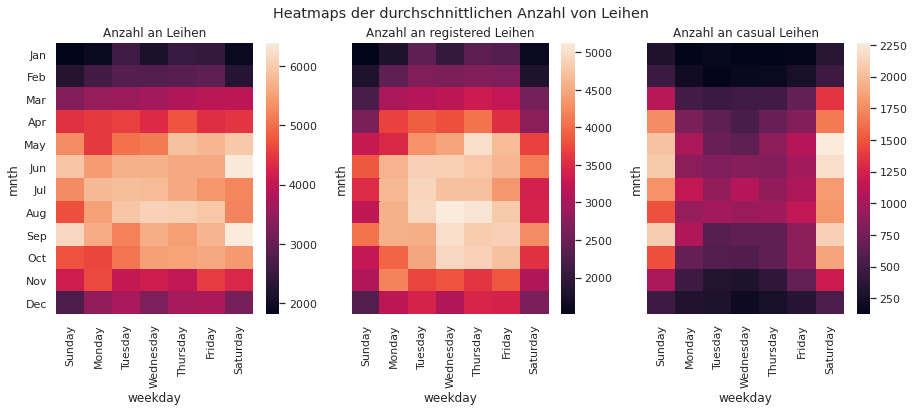

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Heatmaps der durchschnittlichen Anzahl von Leihen')

cnt_hm = sns.heatmap(cnt_pivot, ax=axes[0])
axes[0].set_title('Anzahl an Leihen')

sns.heatmap(registered_pivot, ax=axes[1])
axes[1].set_title('Anzahl an registered Leihen')

sns.heatmap(casual_pivot, ax=axes[2])
axes[2].set_title('Anzahl an casual Leihen')

Es zeigt sich, dass die Monate Dec-Mar verhältnismäßig wenig Leihen zu verzeichnen haben. Die registered Leihen finden schwerpunktmäßig unter der Woche in den Monaten May-Oct statt, währen die casual Leihen insbesondere an den Wochenenden und in den Monaten May, Jun und Sep erfolgen. Die "Saison" für registered Leihen scheint also im Jahresverlauf früher zu beginnen und etwas länger anzudauern.

#### Umfangreiche Korrelationsanalyse

In [27]:
dummy_df = df[['instant', 'temp', 'atemp', 'hum', 'casual', 'registered', 'cnt']]
dummy_df['yr'], dummy_df['workingday'], dummy_df['holiday'] = df['yr'].cat.codes, df['workingday'].cat.codes, df['holiday'].cat.codes
mnth_dummies = pd.get_dummies(df.mnth, prefix='mnth')
weekday_dummies = pd.get_dummies(df.weekday, prefix='weekday')
weathersit_dummies = pd.get_dummies(df.weathersit, prefix='weathersit')
season_dummies = pd.get_dummies(df.season, prefix='season')
dummy_df = dummy_df.join(mnth_dummies)
dummy_df = dummy_df.join(weekday_dummies)
dummy_df = dummy_df.join(weathersit_dummies)
dummy_df = dummy_df.join(season_dummies)
dummy_df.head()

<ipython-input-27-9f999f9ab8d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummy_df['yr'], dummy_df['workingday'], dummy_df['holiday'] = df['yr'].cat.codes, df['workingday'].cat.codes, df['holiday'].cat.codes


,instant,temp,atemp,hum,casual,registered,cnt,yr,workingday,holiday,...,weekday_Thursday,weekday_Friday,weekday_Saturday,weathersit_Clear,weathersit_Mist,weathersit_Light Rain/Snow,season_Winter,season_Spring,season_Summer,season_Fall
0,1,0.344167,0.363625,0.805833,331,654,985,0,0,0,...,0,0,1,0,1,0,1,0,0,0
1,2,0.363478,0.353739,0.696087,131,670,801,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,3,0.196364,0.189405,0.437273,120,1229,1349,0,1,0,...,0,0,0,1,0,0,1,0,0,0
3,4,0.200000,0.212122,0.590435,108,1454,1562,0,1,0,...,0,0,0,1,0,0,1,0,0,0
4,5,0.226957,0.229270,0.436957,82,1518,1600,0,1,0,...,0,0,0,1,0,0,1,0,0,0


In [28]:
dummy_cor = dummy_df.corr()
dummy_cor

,instant,temp,atemp,hum,casual,registered,cnt,yr,workingday,holiday,...,weekday_Thursday,weekday_Friday,weekday_Saturday,weathersit_Clear,weathersit_Mist,weathersit_Light Rain/Snow,season_Winter,season_Spring,season_Summer,season_Fall
instant,1.000000e+00,0.150580,0.152638,0.016375,0.275255,0.659623,0.628830,0.866025,-0.004337,0.016145,...,0.000965,0.002895,-0.001941,0.015848,-0.007566,-0.024295,-0.280863,-0.158036,0.098988,0.341448
temp,1.505803e-01,1.000000,0.991702,0.126963,0.543285,0.540012,0.627494,0.047604,0.052660,-0.028556,...,0.019941,0.000456,-0.029882,0.116091,-0.097706,-0.058238,-0.619800,0.155424,0.678471,-0.224793
atemp,1.526382e-01,0.991702,1.000000,0.139988,0.543864,0.544192,0.631066,0.046106,0.052182,-0.032507,...,0.020873,-0.008108,-0.030889,0.114951,-0.094253,-0.064727,-0.625061,0.163661,0.655956,-0.204904
hum,1.637471e-02,0.126963,0.139988,1.000000,-0.077008,-0.091089,-0.100659,-0.110651,0.024327,-0.015937,...,-0.052636,-0.040456,-0.023980,-0.575317,0.491834,0.267011,-0.181336,-0.003854,0.023101,0.162732
casual,2.752552e-01,0.543285,0.543864,-0.077008,1.000000,0.395282,0.672804,0.248546,-0.518044,0.054274,...,-0.152672,-0.056915,0.368323,0.221928,-0.167439,-0.166103,-0.429106,0.218013,0.303945,-0.098448
registered,6.596229e-01,0.540012,0.544192,-0.091089,0.395282,1.000000,0.945517,0.594248,0.303907,-0.108745,...,0.109740,0.073615,-0.149954,0.216298,-0.140962,-0.224835,-0.510300,0.085578,0.296440,0.124764
cnt,6.288303e-01,0.627494,0.631066,-0.100659,0.672804,0.945517,1.000000,0.566710,0.061156,-0.068348,...,0.034273,0.039118,0.009773,0.252870,-0.172879,-0.239958,-0.563094,0.146197,0.346487,0.065593
yr,8.660254e-01,0.047604,0.046106,-0.110651,0.248546,0.594248,0.566710,1.000000,-0.002013,0.007954,...,-0.000557,-0.000557,-0.004461,0.029429,-0.003869,-0.073941,0.002385,-0.000793,-0.000805,-0.000776
workingday,-4.336537e-03,0.052660,0.052182,0.024327,-0.518044,0.303907,0.061156,-0.002013,1.000000,-0.253023,...,0.259978,0.259978,-0.602541,-0.059165,0.050099,0.028820,-0.025926,0.014543,0.016218,-0.005149
holiday,1.614463e-02,-0.028556,-0.032507,-0.015937,0.054274,-0.108745,-0.068348,0.007954,-0.253023,1.000000,...,-0.023155,-0.023155,-0.070435,0.028875,-0.018972,-0.029577,0.034158,-0.024265,-0.026247,0.016915


<AxesSubplot:>

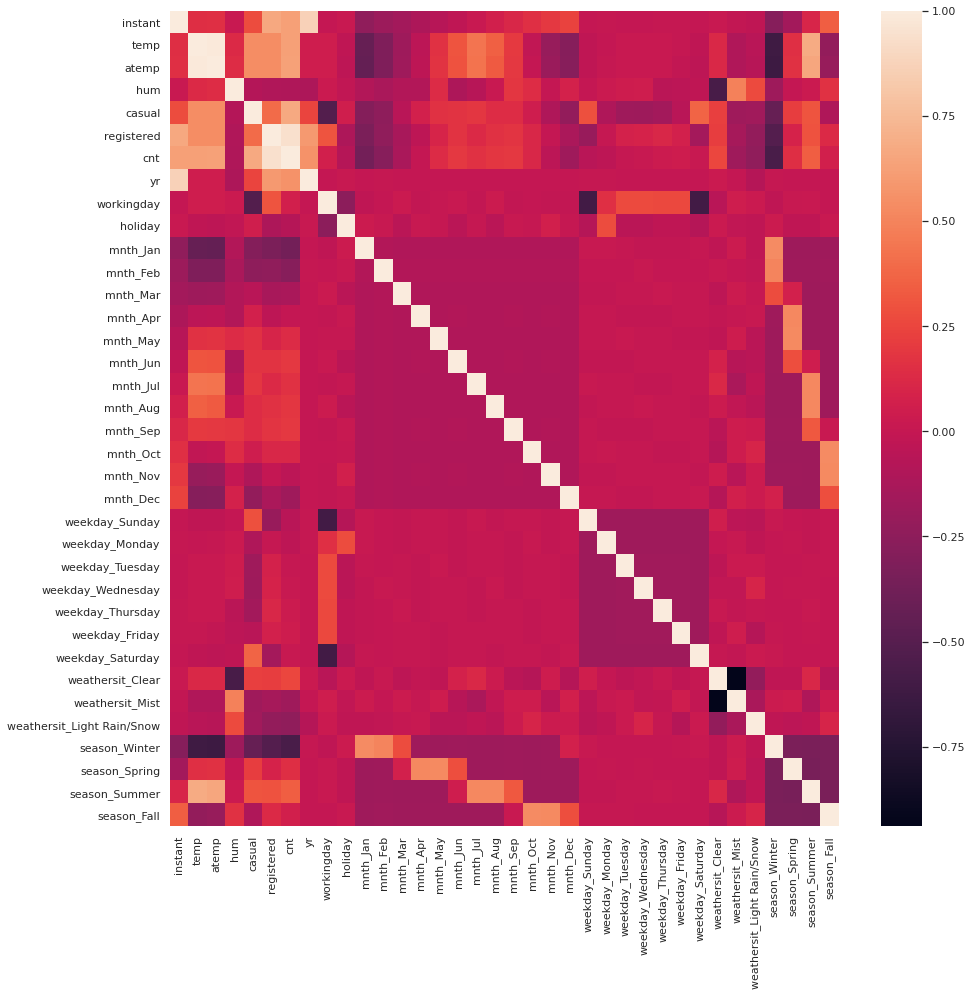

In [29]:
fig, axes = plt.subplots(1, 1, figsize=(15, 15))
sns.heatmap(dummy_cor, xticklabels=dummy_cor.columns, yticklabels=dummy_cor.columns)

Heatmap ist mit dieser Menge von Variablen eher unübersichtlich. Es können jedoch einige Erkenntnisse identifiziert werden:
- Höhere Temperaturen in den Sommermonaten (Jun-Sep)
- Jahreszeitenwechesl in Mar, Jun, Sep, Dec
- Positiver Zusammenhang, Temperatur und Anzahl Leihen
- Negativer Zusammenhang Luftfeuchtigkeit und Anzahl Leihen
- ...

#### Ausleihen nach Wetterlage
Hypothese: Es werden mehr Fahrräder ausgeliehen, bei klaren Wetter als bei Nebel und mehr bei Nebel als bei Regen/Schnee.

Text(0.5, 0, 'Wetterlage')

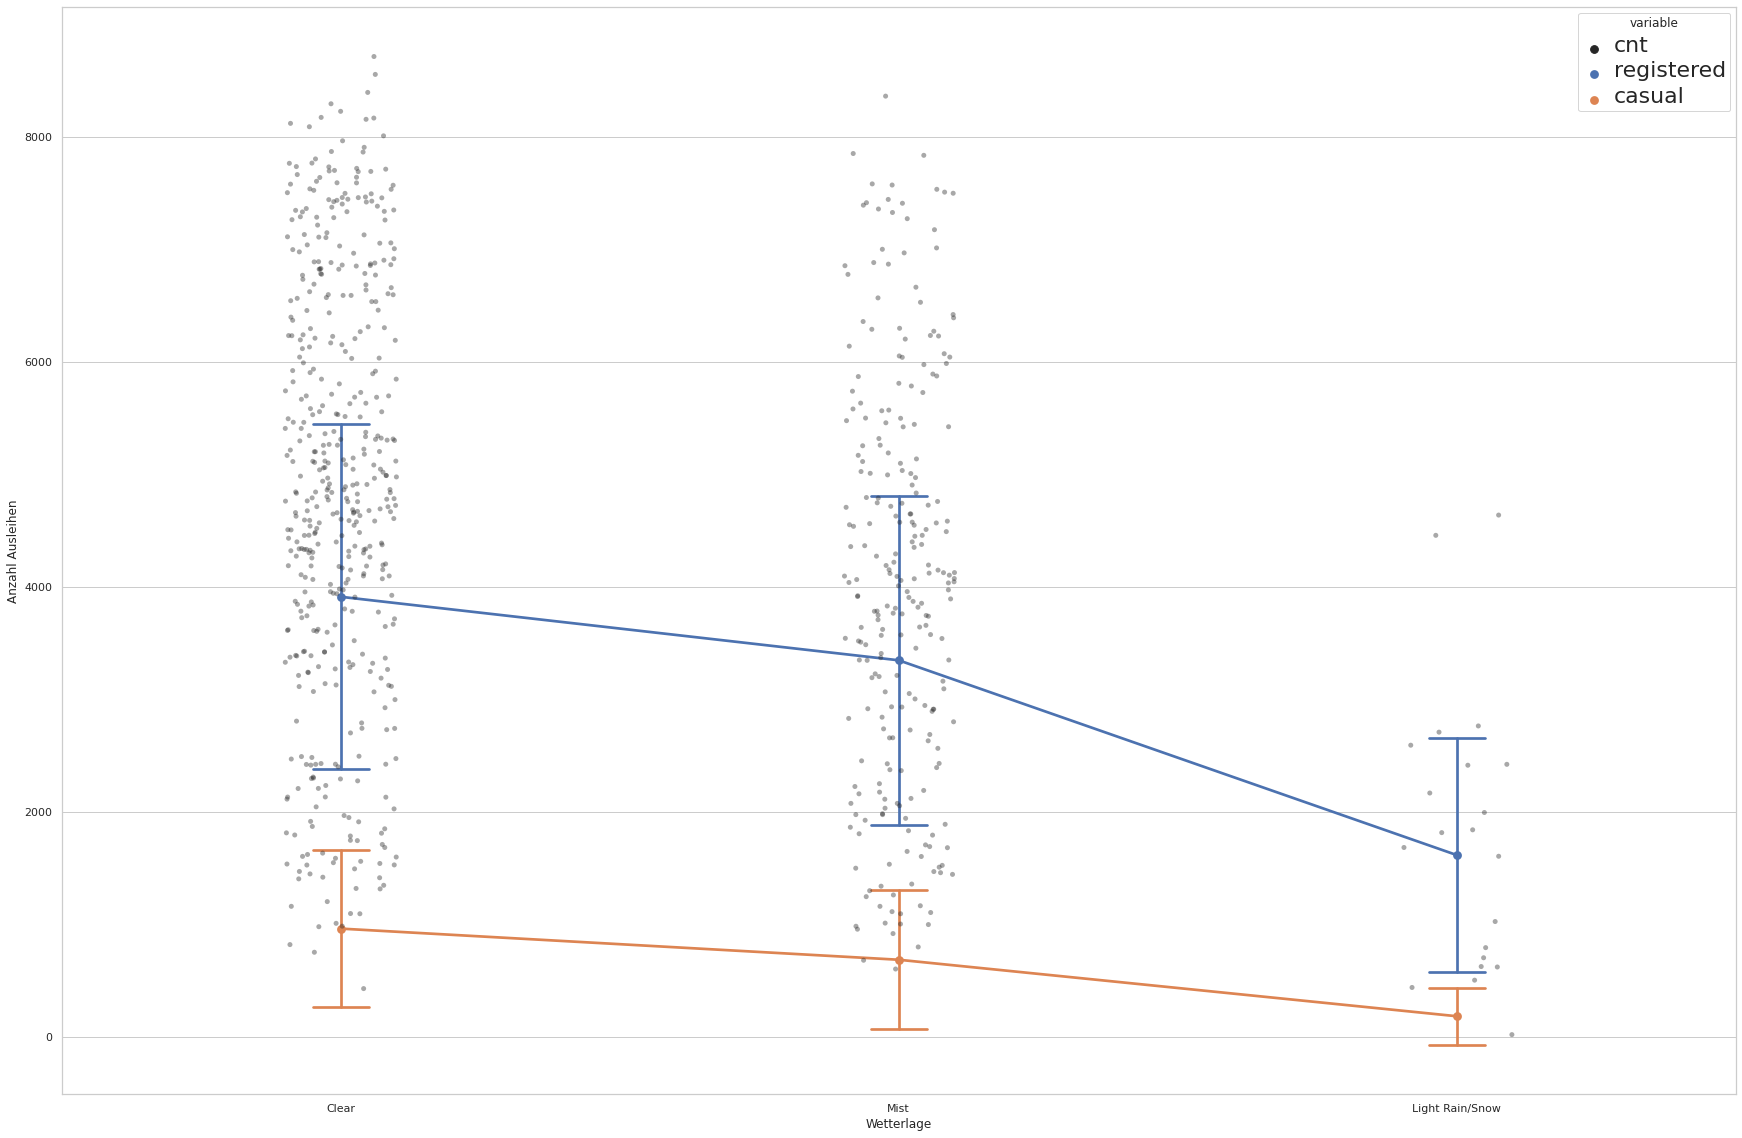

In [30]:
fig = plt.figure(figsize=(30, 20))
rentals_weather_long = pd.melt(df, id_vars=['weathersit'], value_vars=['cnt','registered', 'casual'])

rentals_weather = sns.stripplot(data=rentals_weather_long[rentals_weather_long['variable']=='cnt'],
                                x="weathersit", y="value",hue='variable',alpha=.4,color='black')

sns.pointplot(data=rentals_weather_long[rentals_weather_long['variable'].isin(['registered','casual'])],
              x='weathersit', y='value', hue='variable', ci='sd', capsize=.1, ax=rentals_weather.axes)

plt.setp(rentals_weather.axes.get_legend().get_texts(), fontsize='22')
plt.ylabel('Anzahl Ausleihen')
plt.xlabel('Wetterlage')

Es zeigt sich ein Trend zu einer höheren Anzahl von Leihen bei Klarem Wetter vs. Nebel vs. Regen/Schnee, wobei die sich überlappenden Intervalle (sd) darauf hindeuten, dass es sich um nicht-signifikante Unterschiede handelt. 

#### Ausleihen nach Wochentagen
Hypothesen:
- Unter der Woche finden mehr registered Leihen statt als an den Wochenenden.
- An den Wochenenden findn mehr casual Leihen statt als unter der Woche.

Text(0.5, 0, 'Wochentag')

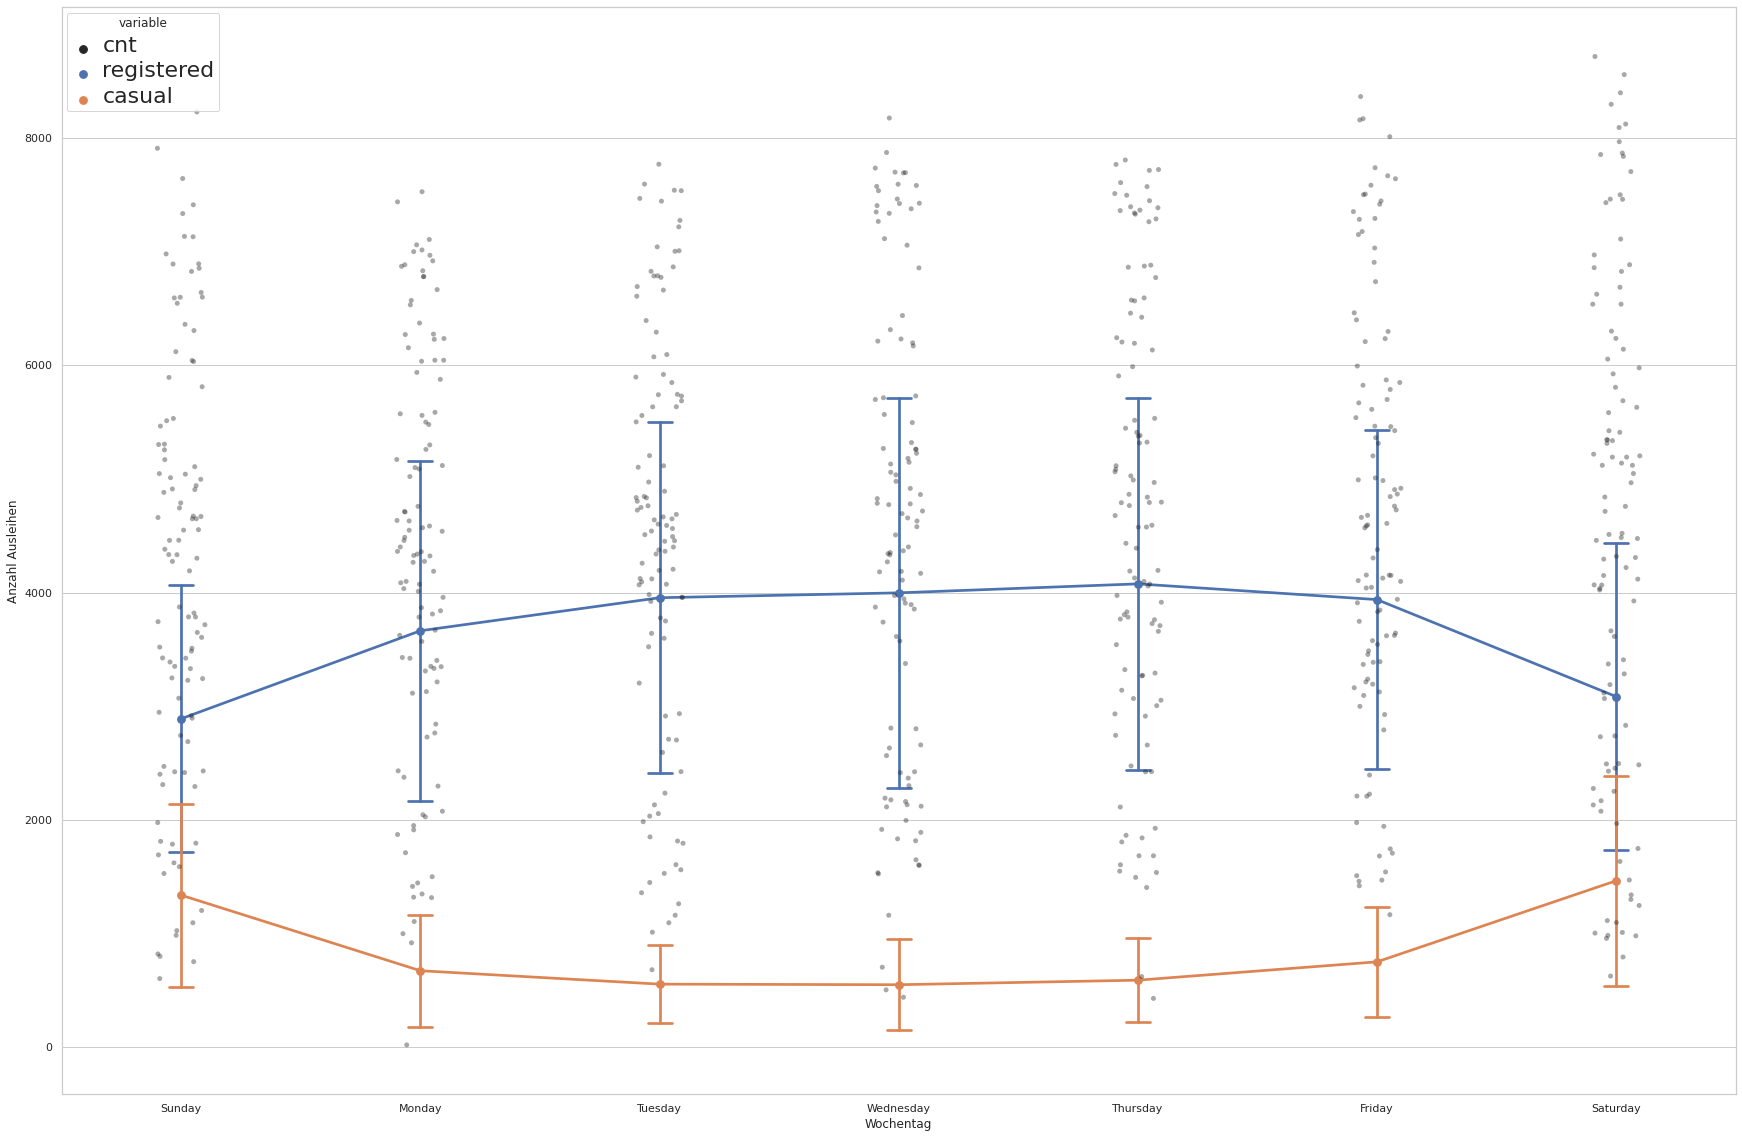

In [31]:
fig = plt.figure(figsize=(30, 20))
rentals_weekday_long = pd.melt(df, id_vars=['weekday','workingday'], value_vars=['cnt','registered', 'casual'])

rentals_weekday = sns.stripplot(data=rentals_weekday_long[rentals_weekday_long['variable']=='cnt'],
                                x="weekday", y="value",hue='variable',alpha=.4,color='black')

sns.pointplot(data=rentals_weekday_long[rentals_weekday_long['variable'].isin(['registered','casual'])],
              x='weekday', y='value', hue='variable', ci='sd', capsize=.1, ax=rentals_weekday.axes)

plt.setp(rentals_weekday.axes.get_legend().get_texts(), fontsize='22')
plt.ylabel('Anzahl Ausleihen')
plt.xlabel('Wochentag')

Die in den Hypothesen formulierten Trends bestätigen sich, auch wenn es erneut so scheint, dass es sich um nicht-signifikante Unterschiede handelt. In diesem Zusammenhang ist auch interessant, dass sich die Intervalle von registered und casual Leihen an den Wochenenden überschneiden.

#### Leihen nach Werktag
Hypothesen:
- Mehr registered Leihen an Werktagen
- Mehr casual Leihen an Werktagen

Text(0.5, 0, 'Werktag (ja/nein)')

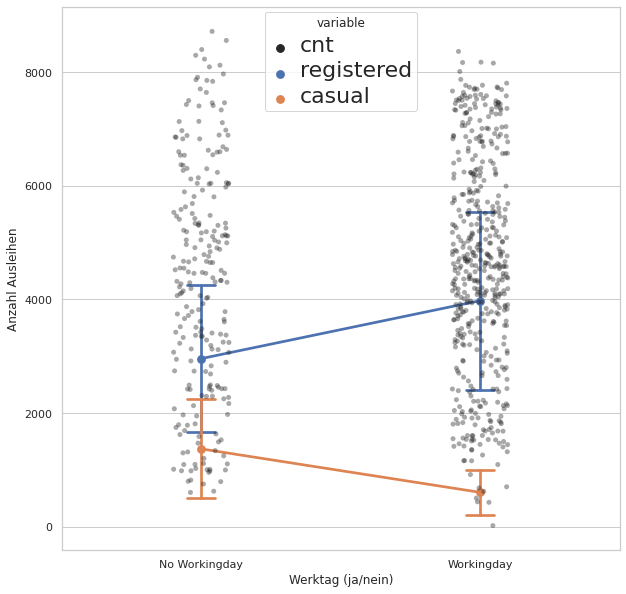

In [32]:
fig = plt.figure(figsize=(10, 10))
rentals_weekday_long = pd.melt(df, id_vars=['weekday','workingday'], value_vars=['cnt','registered', 'casual'])

rentals_weekday = sns.stripplot(data=rentals_weekday_long[rentals_weekday_long['variable']=='cnt'],
                                x="workingday", y="value",hue='variable',alpha=.4,color='black')

sns.pointplot(data=rentals_weekday_long[rentals_weekday_long['variable'].isin(['registered','casual'])],
              x='workingday', y='value', hue='variable', ci='sd', capsize=.1, ax=rentals_weekday.axes)

plt.setp(rentals_weekday.axes.get_legend().get_texts(), fontsize='22')
plt.ylabel('Anzahl Ausleihen')
plt.xlabel('Werktag (ja/nein)')

Der oben erwähnten Hypothesen bestätigen sich, was nicht verwunderlich ist, da Werktage stark mit dem Wochenende korrellieren. Erneut deutet sich an, dass der Unterschied zwischen den registered und casual Leihen an Nicht-Werktagen nicht-signifikant sein könnte. 

#### Zusammenhänge: Wetter und Leihen
Hypothesen:
- Mehr Leihen bei höheren Temperaturen.
- Mehr Leihen bei niedgriegerer Luftfeuchtigkeit.
- Mehr Leihen bei niedrigerer Windgeschwindigkeit.

_Zusammenhang Leihen und gefühlte Temperatur_

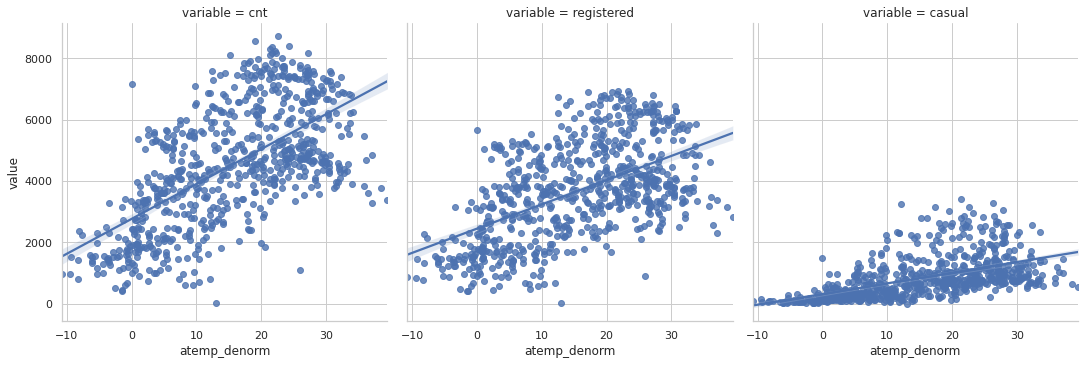

In [33]:
rentals_weather_long = pd.melt(df, id_vars=['atemp_denorm','hum_denorm','windspeed_denorm','weathersit'], value_vars=['cnt','registered', 'casual'])

sns.lmplot(data=rentals_weather_long, x='atemp_denorm', y='value', col='variable')

_Zusammenhang Leihen und Luftfeuchtigkeit_

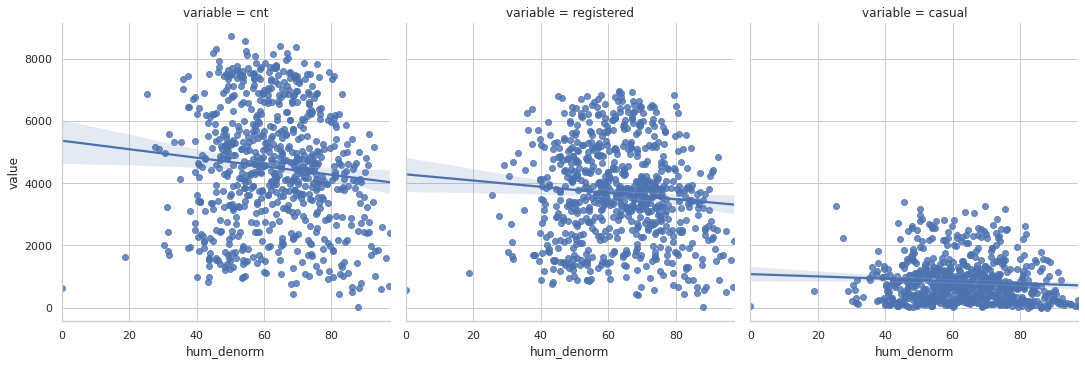

In [34]:
sns.lmplot(data=rentals_weather_long, x='hum_denorm', y='value', col='variable')

_Zusammenhang Leihen und Windgeschwindigkeit_

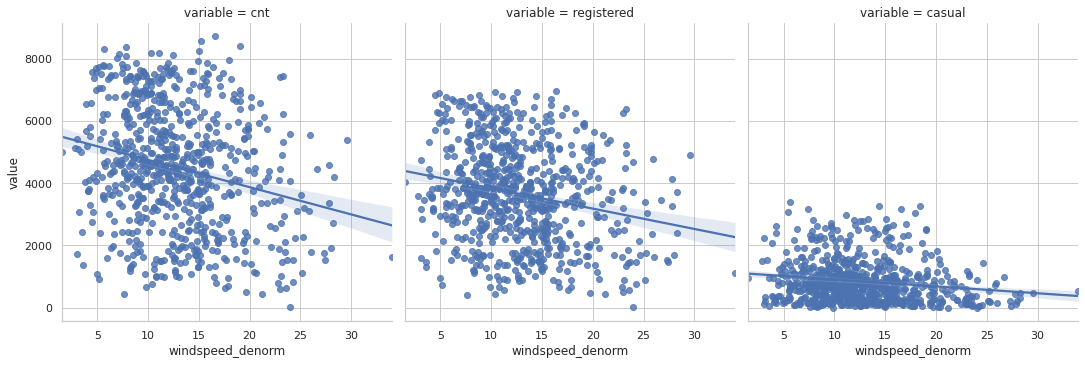

In [35]:
sns.lmplot(data=rentals_weather_long, x='windspeed_denorm', y='value', col='variable')

In der Betrachtung der bivariaten Zusammenhänge bestätigen sich die oben formulierten Hypothesen, auch wenn insbesondere bei der Luftfeuchtigkeit und auch bei der Windgeschwindigkeit die Zusammenhänge nur schwach zu sein scheinen.

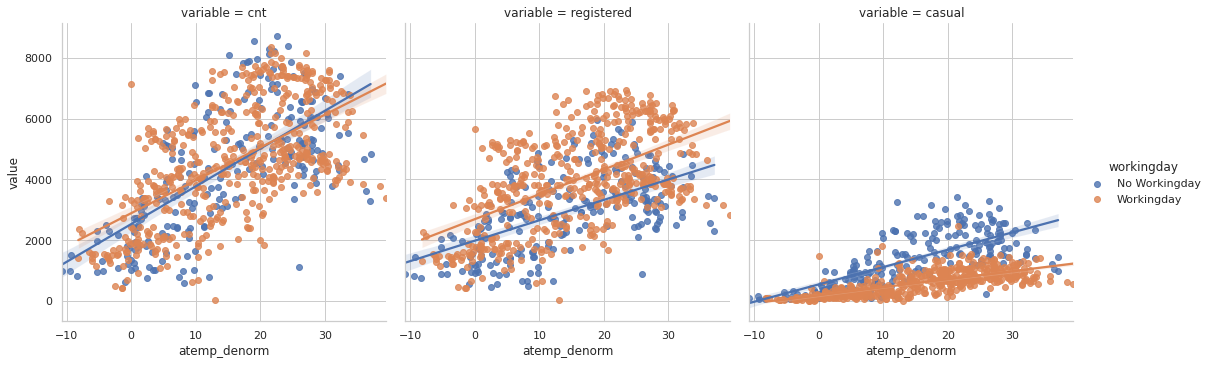

In [37]:
rentals_weather_long = pd.melt(df, id_vars=['atemp_denorm','hum_denorm','windspeed_denorm','weathersit','workingday'], value_vars=['cnt','registered', 'casual'])

sns.lmplot(data=rentals_weather_long, x='atemp_denorm', y='value', col='variable',hue='workingday')

## Fazit
Es zeigt sich ein deutlicher Trend zu mehr Ausleihen bei wärmeren Temperaturen und klarem Wetter.